# Lab Session 11: Monte Carlo Simulation

In [4]:
import pandas as pd
import edhec_risk_kit as erk
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Random Walk Generation

$$\frac{S_{t+dt}-S_t}{S_t}=\mu{}dt+\sigma{}\sqrt{dt}\xi{}_t$$

In [9]:
def gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0, prices=True):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices through Monte Carlo
    :param n_years:  The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g. Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_paths columns and n_years*steps_per_year rows
    """
    dt = 1/steps_per_year #numerator of 1 ==> 1 year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps,n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    return s_0*(1+rets).cumprod()

In [25]:
p = gbm(10,n_scenarios=5)
p.head()

,0,1,2,3,4
0,101.279518,100.337345,95.738052,103.653829,103.594445
1,102.701334,103.040693,98.577949,100.207015,103.886616
2,98.821394,102.092386,93.391133,103.272059,105.711484
3,97.147101,103.595884,90.893500,101.162758,106.165488
4,99.360238,95.351339,88.659774,99.611830,101.464648


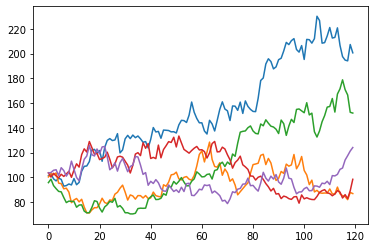

In [26]:
p.plot(legend=False)

In [28]:
p = gbm(n_years=10,n_scenarios=1000)

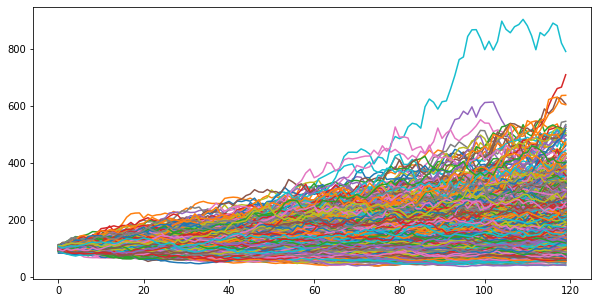

In [29]:
p.plot(figsize=(10,5),legend=False)

In [32]:
def gbm0(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices through Monte Carlo
    """
    dt = 1/steps_per_year #numerator of 1 ==> 1 year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), # loc is mean
                            scale=sigma*np.sqrt(dt), # scale is standard dev
                            size=(n_steps,n_scenarios)) 
    return pd.DataFrame(rets_plus_1).cumprod()

In [34]:
gbm0(n_years=10,n_scenarios=1000).head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.960969,1.015642,1.070138,0.972761,1.005020,1.063187,0.944093,1.013820,1.036525,1.001151,...,1.069732,1.015119,1.027620,1.016582,1.010330,1.002808,0.972340,1.054436,1.043584,0.949600
1,1.031218,0.950362,1.089095,0.962419,1.018591,1.055964,0.965696,1.027684,1.093873,1.040940,...,1.020297,1.008403,1.009438,0.968076,1.114430,1.074595,0.985126,1.070842,1.056496,0.940128
2,1.043556,1.040099,1.192098,0.974568,0.972988,1.043084,0.982802,0.994131,0.998938,1.069858,...,0.936621,0.992801,1.024049,0.895472,1.173646,1.174827,0.939584,0.991795,1.067487,0.962360
3,1.053049,1.082895,1.186036,0.990079,1.022827,1.062219,0.987891,0.969119,0.962720,1.010020,...,0.906759,1.068524,0.969497,0.957238,1.324733,1.157683,0.900183,0.961926,1.050069,1.010663
4,1.006415,1.149088,1.234534,0.975551,1.025945,1.083682,0.971016,1.042588,0.950026,1.045624,...,0.916191,1.031411,0.970848,0.939738,1.293849,1.159924,0.959875,0.961536,1.062067,1.042535


In [35]:
%timeit gbm(n_years=10,n_scenarios=1000)

6.72 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%timeit gbm0(n_years=10,n_scenarios=1000)

4.83 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


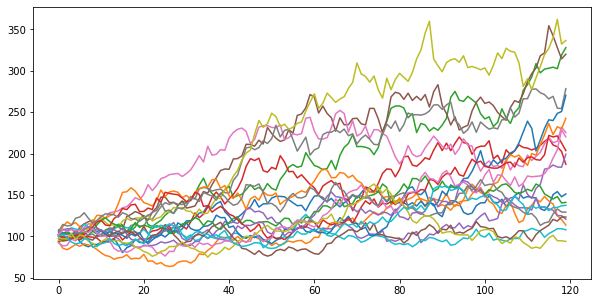

In [38]:
gbm(n_years=10,n_scenarios=20).plot(legend=False,figsize=(10,5))

In [39]:
def gbm0(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices through Monte Carlo
    """
    dt = 1/steps_per_year #numerator of 1 ==> 1 year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), # loc is mean
                            scale=sigma*np.sqrt(dt), # scale is standard dev
                            size=(n_steps,n_scenarios)) 
    rets_plus_1[0] = 1
    return s_0*pd.DataFrame(rets_plus_1).cumprod()

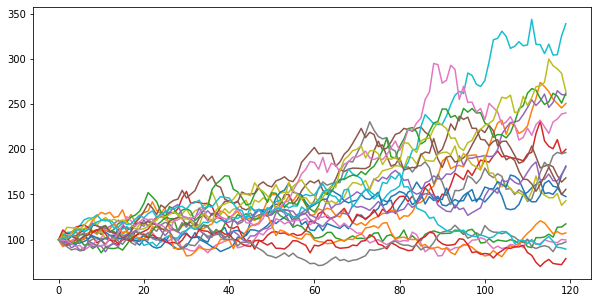

In [40]:
gbm0(n_years=10,n_scenarios=20).plot(legend=False,figsize=(10,5))